# Presenting the hypothesis and cleaning the data

In [153]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [90]:
attacks = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [91]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [216]:
#What about focus our atention ok countries?
attacks["Country"].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

**From my point of view, analyzing how attacks affect depending on the country seems to be interesting, and after that se if shark species are more frecuent in one country vs other. But the probles is that there are lot of countries and this would not give us relevan information.**
- **Solution: Create groups that will concentrate de data, Continents.**

In [217]:
countrys = countrys = { "USA": "AMERICA","AUSTRALIA": "OCEANIA","MEXICO": "AMERICA","CROATIA": "EUROPE", "NORWAY": "EUROPE", "FRANCE": "EUROPE", "MARTINIQUE": "AMERICA", "ICELAND": "EUROPE", 
            "JAVA": "ASIA", "Sierra Leone": "AFRICA", "CYPRUS": "EUROPE", "LIBERIA": "AFRICA", "NEW BRITAIN": "EUROPE", 
            "URUGUAY": "AMERICA", "NORTH ATLANTIC OCEAN": "OTHERS", "ADMIRALTY ISLANDS": "OCEANIA","PAPUA NEW GUINEA": "OCEANIA",
            "DJIBOUTI": "AFRICA", "TAIWAN": "ASIA", "EL SALVADOR": "AMERICA","ST. MAARTIN": "AMERICA", "ASIA?": "ASIA", 
            "NAMIBIA": "AFRICA", "OCEAN": "OTHERS", "CAPE VERDE": "AFRICA", 
            "MID ATLANTIC OCEAN": "OTHERS", "MAURITIUS": "AFRICA", "ANTIGUA": "AMERICA", "FRENCH POLYNESIA": "OCEANIA", 
            "JOHNSTON ISLAND": "AMERICA", "SUDAN": "AFRICA", "SOUTH KOREA": "ASIA", "TUVALU": "OCEANIA", 
            "SOUTH ATLANTIC OCEAN": "OTHERS", "UNITED ARAB EMIRATES (UAE)": "ASIA", "DOMINICAN REPUBLIC": "AMERICA", 
            "PHILIPPINES": "ASIA", "MALAYSIA": "ASIA", "BRITISH VIRGIN ISLANDS": "AMERICA", "CHINA": "ASIA", 
            "ATLANTIC OCEAN": "OTHERS", "ITALY": "EUROPE", "VENEZUELA": "AMERICA", "SOLOMON ISLANDS / VANUATU": "OCEANIA", 
            "SOUTH CHINA SEA": "ASIA", "Between PORTUGAL & INDIA": "OTHERS",  
            "MEDITERRANEAN SEA?": "OTHERS", "INDIAN OCEAN?": "ASIA", "INDIA": "ASIA", "SOUTH AFRICA": "AFRICA", 
            "St Helena": "AFRICA", "WESTERN SAMOA": "OCEANIA", "TASMAN SEA": "OCEANIA", "HONG KONG": "ASIA", "TONGA": "OCEANIA", 
            "YEMEN": "ASIA", "COLUMBIA": "AMERICA", "NORTHERN MARIANA ISLANDS": "OCEANIA", "GUAM": "OCEANIA", "GUINEA": "AFRICA", 
            "CENTRAL PACIFIC": "OTHERS", "GUATEMALA": "AMERICA", "FIJI": "OCEANIA", "GULF OF ADEN": "EUROPE", "JAPAN": "ASIA", 
            "MID-PACIFC OCEAN": "OTHERS", "ST. MARTIN": "AMERICA", "CRETE": "EUROPE", "BRAZIL": "AMERICA", 
            "TURKS & CAICOS": "AMERICA", "SOUTHWEST PACIFIC OCEAN": "OTHERS", "GREENLAND": "AMERICA", 
            "BAY OF BENGAL": "ASIA", "PACIFIC OCEAN": "OTHERS", "LEBANON": "ASIA", "MALTA": "EUROPE", "NIGERIA": "AFRICA", 
            "GREECE": "EUROPE", "MEXICO": "AMERICA", "BERMUDA": "AMERICA", "UNITED KINGDOM": "EUROPE", "SINGAPORE": "ASIA", 
            "BRITISH ISLES": "EUROPE", "TURKEY": "EUROPE", "NEVIS": "AMERICA", "ENGLAND": "EUROPE", 
            "SIERRA LEONE": "AFRICA", "VANUATU": "OCEANIA", "NORTH SEA": "OTHERS", "RUSSIA": "EUROPE", "MICRONESIA": "OCEANIA", 
            "PORTUGAL": "EUROPE", "RED SEA": "OTHERS", "MONTENEGRO": "EUROPE", "IRAQ": "ASIA", "SWEDEN": "EUROPE", 
            "PERSIAN GULF": "ASIA", "NORTH ATLANTIC OCEAN": "OTHERS", "Fiji": "OCEANIA", "SLOVENIA": "EUROPE", 
            "PHILIPPINES": "ASIA", "IRAN / IRAQ": "ASIA", "TUNISIA": "AFRICA", "SAN DOMINGO": "AMERICA", "AZORES": "EUROPE", 
            "GEORGIA": "EUROPE", "BURMA": "ASIA", "NEW GUINEA": "OCEANIA", "SUDAN?": "AFRICA", "NETHERLANDS ANTILLES": "AMERICA", 
            "ALGERIA": "AFRICA", "NICARAGUA": "AMERICA", "SEYCHELLES": "AFRICA", "RED SEA?": "OTHERS", 
            "BRITISH NEW GUINEA": "OCEANIA", 
            "THAILAND": "ASIA", "PALESTINIAN TERRITORIES": "ASIA", "FALKLAND ISLANDS": "AMERICA", "IRELAND": "EUROPE", 
            "MONACO": "EUROPE", "PARAGUAY": "AMERICA", "SYRIA": "ASIA", "EGYPT": "AFRICA", "MADAGASCAR": "AFRICA", 
            "NORTH PACIFIC OCEAN": "OTHERS", "EGYPT / ISRAEL": "ASIA", "COOK ISLANDS": "OCEANIA", 
            "TRINIDAD & TOBAGO": "AMERICA", "PACIFIC OCEAN": "OTHERS", "EQUATORIAL GUINEA / CAMEROON": "AFRICA", 
            "ISRAEL": "ASIA", "SAMOA": "OCEANIA", "ECUADOR": "AMERICA", "CARIBBEAN SEA": "AMERICA", "NEW CALEDONIA": "OCEANIA", 
            "MARSHALL ISLANDS": "OCEANIA", "PANAMA": "AMERICA", "UNITED ARAB EMIRATES": "ASIA", "ITALY / CROATIA": "EUROPE", 
            "NEW ZEALAND": "OCEANIA", "MALDIVE ISLANDS": "ASIA", "GHANA": "AFRICA", "MOZAMBIQUE": "AFRICA", "SRI LANKA": "ASIA", 
            "SOLOMON ISLANDS": "OCEANIA", "Coast of AFRICA": "AFRICA", "BARBADOS": "AMERICA", "BANGLADESH": "ASIA", 
            "CHILE": "AMERICA", "CANADA": "AMERICA", "HONDURAS": "AMERICA", "PALAU": "OCEANIA", "AMERICAN SAMOA": "OCEANIA", 
            "SAUDI ARABIA": "ASIA", "TONGA": "OCEANIA", "SPAIN": "EUROPE", "ARGENTINA": "AMERICA", "CURACAO": "AMERICA", 
            "ANDAMAN / NICOBAR ISLANDAS": "ASIA", "KENYA": "AFRICA", "EGYPT": "AFRICA", "THE BALKANS": "EUROPE", 
            "PUERTO RICO": "AMERICA", "KIRIBATI": "OCEANIA", "OKINAWA": "ASIA", "REUNION": "AFRICA", 
            "BRITISH WEST INDIES": "AMERICA", "NICARAGUA": "AMERICA", "FEDERATED STATES OF MICRONESIA": "OCEANIA", 
            "IRAN": "ASIA", "CAYMAN ISLANDS": "AMERICA", "SOMALIA": "AFRICA", "INDONESIA": "ASIA", "KUWAIT": "ASIA", 
            "Seychelles": "AFRICA", "COSTA RICA": "AMERICA", "INDIAN OCEAN": "OTHERS", "CEYLON (SRI LANKA)": "ASIA", 
            "YEMEN": "ASIA", "HAITI": "AMERICA", "SCOTLAND": "EUROPE", "CUBA": "AMERICA", "GUYANA": "AMERICA", "LIBYA": "AFRICA", 
             "SENEGAL": "AFRICA", "GRAND CAYMAN": "EUROPE", "GABON": "AFRICA", "GRENADA": "AMERICA", 
            "RED SEA / INDIAN OCEAN": "OTHERS", "VIETNAM": "ASIA", "BAHAMAS": "AMERICA", "BAHREIN": "ASIA", 
            "NORTHERN ARABIAN SEA": "ASIA", "BELIZE": "AMERICA", "MEDITERRANEAN SEA": "OTHERS", "ANGOLA": "AFRICA", 
            "SOUTH PACIFIC OCEAN": "OTHERS", "TANZANIA": "AFRICA", "KOREA": "ASIA", "JAMAICA": "AMERICA", "ARUBA": "AMERICA", 
            "MAYOTTE":"AFRICA"}

            


In [218]:
attacks["Continent"] = attacks["Country"].map(countrys)
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Continent
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,AMERICA
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,AMERICA
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,AMERICA
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,OCEANIA
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,AMERICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# We have clean our information, and just have the necesary continents.
attacks["Continent"].unique()

array(['AMERICA', 'OCEANIA', 'EUROPE', 'AFRICA', 'ASIA', nan, 'OTHERS'],
      dtype=object)

In [220]:
attacks["Continent"].value_counts(dropna=False)

NaN        19506
AMERICA     2810
OCEANIA     1863
AFRICA       829
ASIA         347
EUROPE       284
OTHERS        84
Name: Continent, dtype: int64

In [222]:
# For having information as usefull as possible, we drop all NaN attacks, those which dont have country information.
attacks_final = attacks[attacks["Continent"].notnull()]
attacks_final

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Continent
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,AMERICA
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,AMERICA
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,AMERICA
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,OCEANIA
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,AMERICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,OCEANIA
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,OCEANIA
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,AMERICA
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,AMERICA


## We obtein our new and cleaner dataframe, focus on attacks by continents.

In [234]:
# I take out NaN species in order to be able to add some funtions to it.
attacks_final = attacks_final[attacks_final["Species "].notnull()]
attacks_final

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Continent
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,AMERICA
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,OCEANIA
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,AMERICA
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,AMERICA
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,AMERICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,ND.0026,Early 1930s,0.0,Unprovoked,BELIZE,NaN,NaN,Standing,a servant,M,...,Mitchell-Hedges,ND-0026-Belize.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0026,ND.0026,27.0,NaN,NaN,AMERICA
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,...,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN,OCEANIA
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN,OCEANIA
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN,OCEANIA


## I would like to cross my information by continent whith the species of sharks.

In [235]:
attacks_final["Species "].value_counts(dropna=False)

White shark                                                                                        163
Shark involvement prior to death was not confirmed                                                 103
Invalid                                                                                            102
Shark involvement not confirmed                                                                     86
Tiger shark                                                                                         72
                                                                                                  ... 
Survivors said 2 species of sharks were involved:  oceanic whitetip sharks and another species,      1
5' thresher or blue shark. The shark  was killed following the incident                              1
Whitetip reef shark                                                                                  1
Grey reef shark, 1.5 m                                                   

In [256]:
#After droping those Nan species, I would create groups of species in order to have more usefull information.
def contains(col):
    Words = ["brown","blue","black", "large", "dog", "grey", "sand", "small", "zambesi", "wobbeggong", "white", "raggettooth","tiger","bronce","spinner"]
    for word in col:
        if word in Words:
            if col.find(lower(word)):
                return "word"
        else:
            return "others"


In [257]:
attacks_final["Shark_species"] = attacks_final["Species "].apply(contains)
attacks_final

<ipython-input-257-c6ba21381bd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks_final["Shark_species"] = attacks_final["Species "].apply(contains)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Continent,Shark_species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,AMERICA,others
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,OCEANIA,others
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,AMERICA,others
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,AMERICA,others
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,AMERICA,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,ND.0026,Early 1930s,0.0,Unprovoked,BELIZE,NaN,NaN,Standing,a servant,M,...,ND-0026-Belize.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0026,ND.0026,27.0,NaN,NaN,AMERICA,others
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,...,ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN,OCEANIA,others
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN,OCEANIA,others
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN,OCEANIA,others


In [258]:
attacks_final["Shark_species"].value_counts(dropna=False)

others    3445
Name: Shark_species, dtype: int64

In [200]:
attacks_final["Age"].value_counts(dropna=False)

NaN         1257
19            90
18            87
17            85
20            81
            ... 
33 & 37        1
20?            1
30 & 32        1
60s            1
25 to 35       1
Name: Age, Length: 125, dtype: int64

In [201]:
attacks_final2 = attacks_final[attacks_final["Age"].notnull()]
attacks_final2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Continent,Shark_species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,AMERICA,None
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,AMERICA,None
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,AMERICA,None
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,AMERICA,None
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,...,2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,NaN,NaN,OCEANIA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,ND.0068,Before 1962,0.0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,Les Bishop,M,...,ND-0068-LesBishop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0068,ND.0068,64.0,NaN,NaN,AFRICA,None
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,...,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0,NaN,NaN,ASIA,None
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,...,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0,NaN,NaN,ASIA,None
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,...,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38.0,NaN,NaN,ASIA,None


In [204]:
def ages(col):
    for char in col:
        if char.isnumeric():
            return (r'(\d{1,2})')*12
        elif char.isnumeric():
            return r'(\d{1,2})'
        elif char == "Teen":
            return char == int(15)
        else:
            return "other"

In [205]:
attacks_final2["Age_number"] = attacks_final2["Age"].apply(ages)

<ipython-input-205-f48974a04c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks_final2["Age_number"] = attacks_final2["Age"].apply(ages)


<AxesSubplot:xlabel='Continent', ylabel='count'>

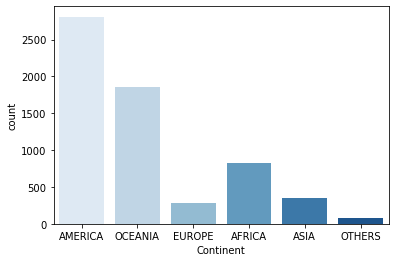

In [165]:
sns.countplot(x=attacks_final.Continent, palette= "Blues")